In [118]:
import nltk
import heapq
from nltk.corpus import stopwords
import pandas as pd
import re
from nltk.tokenize import word_tokenize

In [119]:
data = pd.read_csv("spam.csv", encoding='latin-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [120]:
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [121]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAHUL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [122]:
def remove_stopwords(text):
    # Remove specific substrings
    text = re.sub(r'<#>', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    words = word_tokenize(text)
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

In [123]:
data['v2'] = data['v2'].apply(remove_stopwords)
print(data.head())

     v1                                                 v2
0   ham  Go jurong point crazy Available bugis n great ...
1   ham                            Ok lar Joking wif u oni
2  spam  Free entry 2 wkly comp win FA Cup final tkts 2...
3   ham                U dun say early hor U c already say
4   ham        Nah dont think goes usf lives around though


In [124]:
#Making two classes: Ham and spam

In [125]:
ham_data = data[data['v1'] == 'ham']
spam_data = data[data['v1'] == 'spam']

In [126]:
print("Ham Data:")
print(ham_data.head())

print("\nSpam Data:")
print(spam_data.head())

Ham Data:
    v1                                                 v2
0  ham  Go jurong point crazy Available bugis n great ...
1  ham                            Ok lar Joking wif u oni
3  ham                U dun say early hor U c already say
4  ham        Nah dont think goes usf lives around though
6  ham     Even brother like speak treat like aids patent

Spam Data:
      v1                                                 v2
2   spam  Free entry 2 wkly comp win FA Cup final tkts 2...
5   spam  FreeMsg Hey darling 3 weeks word back Id like ...
8   spam  WINNER valued network customer selected receiv...
9   spam  mobile 11 months U R entitled Update latest co...
11  spam  SIX chances win CASH 100 20000 pounds txt CSH1...


## Top 10 words for HAM

In [127]:
from collections import Counter
def get_most_frequent_words(texts, n=10):
    all_words = ' '.join(texts).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(n)


ham_top_words = get_most_frequent_words(ham_data['v2'])

print("Top 10 words in Ham messages:")
print(ham_top_words)

Top 10 words in Ham messages:
[('u', 716), ('2', 305), ('Im', 301), ('get', 290), ('ltgt', 276), ('U', 256), ('go', 231), ('know', 226), ('like', 217), ('got', 212)]


## Top 10 words for SPAM

In [128]:

spam_top_words = get_most_frequent_words(spam_data['v2'])
print("\nTop 10 words in Spam messages:")
print(spam_top_words)


Top 10 words in Spam messages:
[('call', 189), ('2', 173), ('Call', 137), ('4', 119), ('FREE', 112), ('ur', 107), ('mobile', 95), ('U', 85), ('claim', 78), ('prize', 73)]


## Top 10 Bigrams for HAM

In [129]:
from nltk import bigrams
def get_most_frequent_bigrams(texts, n=10):
    all_words = ' '.join(texts).split()
    bigram_list = list(bigrams(all_words))
    bigram_counts = Counter(bigram_list)
    return bigram_counts.most_common(n)

In [130]:
ham_top_bigrams = get_most_frequent_bigrams(ham_data['v2'])
print("\nTop 10 bigrams in Ham messages:")
print(ham_top_bigrams)


Top 10 bigrams in Ham messages:
[(('gon', 'na'), 57), (('call', 'later'), 50), (('Ill', 'call'), 47), (('Sorry', 'Ill'), 39), (('wan', '2'), 31), (('let', 'know'), 29), (('dont', 'know'), 27), (('r', 'u'), 25), (('wan', 'na'), 22), (('u', 'get'), 19)]


## Top 10 Bigrams for SPAM

In [131]:
spam_top_bigrams = get_most_frequent_bigrams(spam_data['v2'])
print("\nTop 10 bigrams in Spam messages:")
print(spam_top_bigrams)


Top 10 bigrams in Spam messages:
[(('Please', 'call'), 26), (('prize', 'GUARANTEED'), 21), (('GUARANTEED', 'Call'), 21), (('å1000', 'cash'), 19), (('await', 'collection'), 19), (('land', 'line'), 18), (('every', 'week'), 18), (('2', 'claim'), 17), (('PO', 'Box'), 17), (('Valid', '12hrs'), 16)]


## Top 10 Trigrmas for HAM:

In [132]:
from nltk import trigrams
def get_most_frequent_trigrams(texts, n=10):
    all_words = ' '.join(texts).split()
    trigram_list = list(trigrams(all_words))
    trigram_counts = Counter(trigram_list)
    return trigram_counts.most_common(n)

In [133]:
ham_top_trigrams = get_most_frequent_trigrams(ham_data['v2'])
print("\nTop 10 trigrams in Ham messages:")
print(ham_top_trigrams)


Top 10 trigrams in Ham messages:
[(('Ill', 'call', 'later'), 41), (('Sorry', 'Ill', 'call'), 38), (('Im', 'gon', 'na'), 14), (('u', 'wan', '2'), 13), (('cant', 'pick', 'phone'), 12), (('pick', 'phone', 'right'), 12), (('phone', 'right', 'Pls'), 12), (('right', 'Pls', 'send'), 12), (('Pls', 'send', 'message'), 12), (('U', 'wan', '2'), 8)]


## Top 10 Trigrams for SPAM  

In [134]:
spam_top_trigrams = get_most_frequent_trigrams(spam_data['v2'])
print("\nTop 10 trigrams in Spam messages:")
print(spam_top_trigrams)


Top 10 trigrams in Spam messages:
[(('prize', 'GUARANTEED', 'Call'), 20), (('land', 'line', 'Claim'), 13), (('PRIVATE', '2003', 'Account'), 13), (('2003', 'Account', 'Statement'), 13), (('shows', '800', 'unredeemed'), 12), (('URGENT', 'trying', 'contact'), 11), (('every', 'week', 'txt'), 11), (('call', 'customer', 'service'), 10), (('customer', 'service', 'representative'), 10), (('guaranteed', 'å1000', 'cash'), 10)]


In [135]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [136]:
def generate_wordcloud(texts, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(texts))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

## Word Cloud for HAM

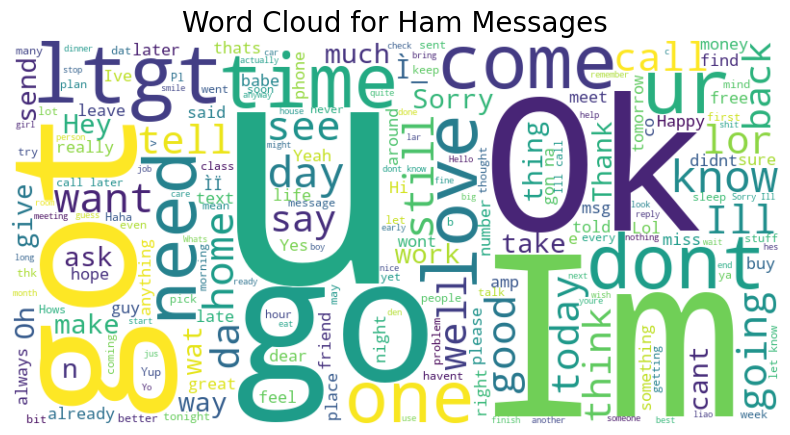

In [137]:
generate_wordcloud(ham_data['v2'], 'Word Cloud for Ham Messages')

## Word cloud for SPAM

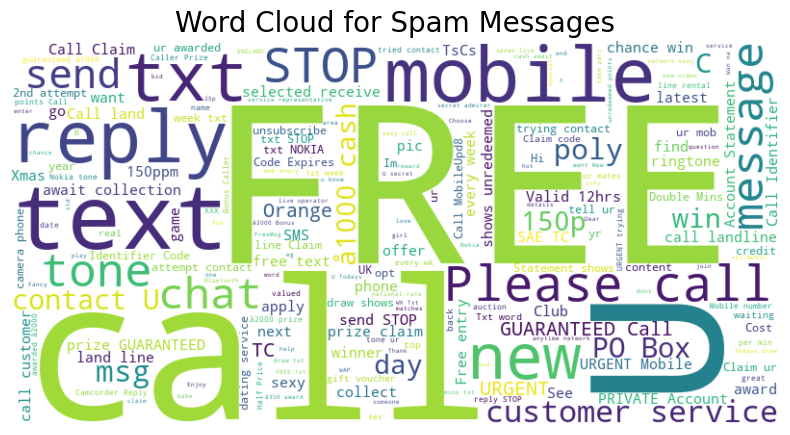

In [138]:
generate_wordcloud(spam_data['v2'], 'Word Cloud for Spam Messages')

## Bag Of Words


In [139]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english', lowercase=True)
X = vectorizer.fit_transform(data['v2'])
feature_names = vectorizer.get_feature_names_out()

print(f"Feature names: {feature_names[:10]}")

Feature names: ['008704050406' '0089my' '0121' '01223585236' '01223585334' '0125698789'
 '02' '020603' '0207' '02070836089']


In [140]:
print(data['v2'].head())


0    Go jurong point crazy Available bugis n great ...
1                              Ok lar Joking wif u oni
2    Free entry 2 wkly comp win FA Cup final tkts 2...
3                  U dun say early hor U c already say
4          Nah dont think goes usf lives around though
Name: v2, dtype: object


## Machine Learning model and F1 score

In [141]:
data['v1'] = data['v1'].map({'ham': 0, 'spam': 1})

In [142]:
X = vectorizer.fit_transform(data['v2'])
y = data['v1']

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)

print(f"F1 Score: {f1}")

F1 Score: 0.8929889298892989


## F1 score for Logistic Regression: 89.29%

# TF-IDF

In [112]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [145]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)
X = tfidf_vectorizer.fit_transform(data['v2'])
feature_names = tfidf_vectorizer.get_feature_names_out()

print(f"Feature names: {feature_names[:10]}")


Feature names: ['008704050406' '0089my' '0121' '01223585236' '01223585334' '0125698789'
 '02' '020603' '0207' '02070836089']


## TF-IDF Machine Learning

In [146]:
X = tfidf_vectorizer.fit_transform(data['v2'])
y = data['v1']

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)

print(f"F1 Score: {f1}")

F1 Score: 0.7088607594936709


## F1 score after TF-IDF is 70.88 which is significantly less than the F1-Score of BoW

## Pre Processing text: 

In [148]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download the necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert text to lower case
    text = text.lower()
    
    # Remove email IDs
    text = re.sub(r'\b[\w\.-]+@[\w\.-]+\.\w{2,4}\b', '', text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    
    # Apply lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return ' '.join(words)

# Example usage
data['v2'] = data['v2'].apply(preprocess_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RAHUL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RAHUL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAHUL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [153]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)
X1 = tfidf_vectorizer.fit_transform(data['v2'])

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

print(f"Feature names: {feature_names[:10]}")

Feature names: ['____' 'aa' 'aah' 'aaniye' 'aaooooright' 'aathilove' 'aathiwhere' 'ab'
 'abbey' 'abdomen']


In [154]:
X = X1
y = data['v1']

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)

print(f"F1 Score: {f1}")

F1 Score: 0.7459016393442623
